<a href="https://colab.research.google.com/github/mereetmoner/COVID_19/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

**Load Datasets**


In [ ]:
TRAIN_PATH = "/content/drive/MyDrive/Covid-19/Dataset/Train"
VAL_PATH = "/content/drive/MyDrive/Covid-19/Dataset/Val"


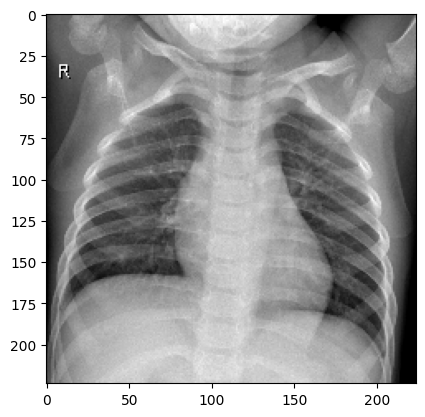

In [ ]:
#X-Ray image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image
def show_the_image(xray):
  xray = load_img(xray, target_size=(224, 224))
  plt.imshow(xray)
show_the_image('/content/drive/MyDrive/Covid-19/Dataset/Val/Normal/NORMAL2-IM-0416-0001-0001.jpeg')

In [ ]:
# Train from scratch
# make the traing_data objects
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Covid-19/Dataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Covid-19/Dataset/Val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
class_names = ['Covid', 'Normal']
train_datagen.class_names = class_names
validation_generator.class_names = class_names

NUM_CLASSES = len(class_names)

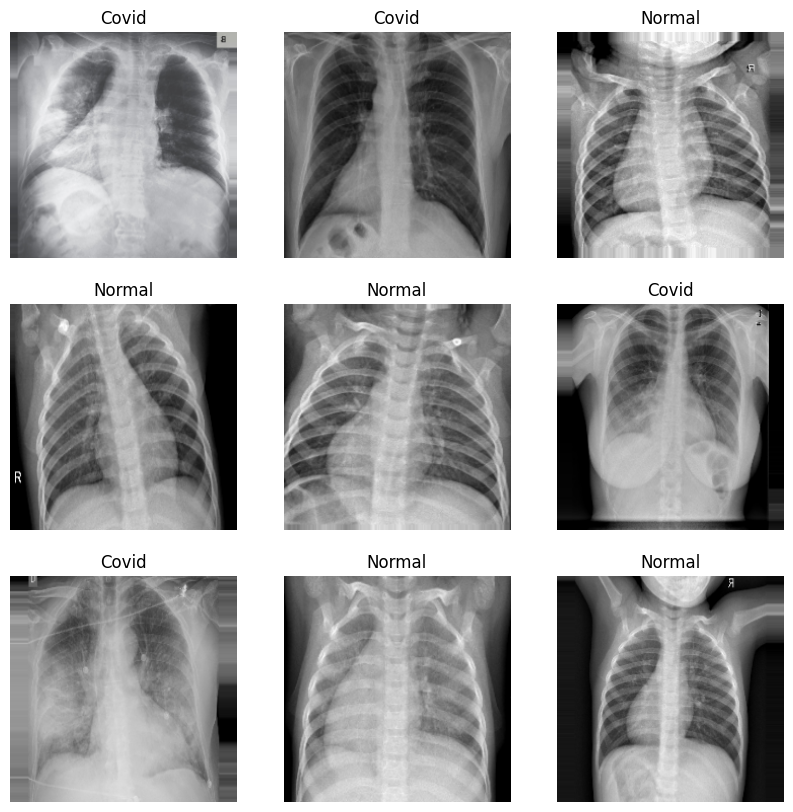

In [ ]:
# Get class names from class indices
class_names = list(train_generator.class_indices.keys())

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(1):
    images, labels = train_generator.next()
    for j in range(9):
        ax = plt.subplot(3, 3, j + 1)
        plt.imshow(images[j].astype("float32"))
        plt.title(class_names[int(labels[j])])
        plt.axis("off")

plt.show()

**building model**

In [ ]:
# CNN Based Model
# Its a sequential model, which means it has layers
# Each layer has certain filters. like layer1 has n no of filters, layer2 has m no of filters and so on.

# Here we will be creating 3 or 4 cnn layers followed by classification layers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))    # add another conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))           # add maxpooling layer
model.add(Dropout(0.25))
# we havent used vgg bcs it will overfit. watch tut at 57.00

# SECOND conv layer
model.add(Conv2D(64, (3, 3), activation='relu'))    # add another conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))           # add maxpooling layer
model.add(Dropout(0.25))

# THIRD conv layer
model.add(Conv2D(128, (3, 3), activation='relu'))    # add another conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))           # add maxpooling layer
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

**Fit The Model**


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
6/6 [==============================] - 140s 25s/step - loss: 1.3968 - accuracy: 0.5208 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 82s 14s/step - loss: 0.6881 - accuracy: 0.5521 - val_loss: 0.6795 - val_accuracy: 0.6833
Epoch 3/10
6/6 [==============================] - 77s 13s/step - loss: 0.6192 - accuracy: 0.6979 - val_loss: 0.5421 - val_accuracy: 0.9333
Epoch 4/10
6/6 [==============================] - 75s 12s/step - loss: 0.4108 - accuracy: 0.8073 - val_loss: 0.2259 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 80s 13s/step - loss: 0.4002 - accuracy: 0.8490 - val_loss: 0.3065 - val_accuracy: 0.9500
Epoch 6/10
6/6 [==============================] - 77s 13s/step - loss: 0.3603 - accuracy: 0.8594 - val_loss: 0.2124 - val_accuracy: 0.9500
Epoch 7/10
6/6 [==============================] - 77s 13s/step - loss: 0.2708 - accuracy: 0.8906 - val_loss: 0.2328 - val_accuracy: 0.9667
Epoch 8/10
6/6 [==========

In [ ]:
score = model.evaluate(validation_generator, verbose=0)
print('loss: ', score[0])
print('accuracy: ', score[1])

loss:  0.08431138843297958
accuracy:  0.9833333492279053


**Summarize history for accuracy**

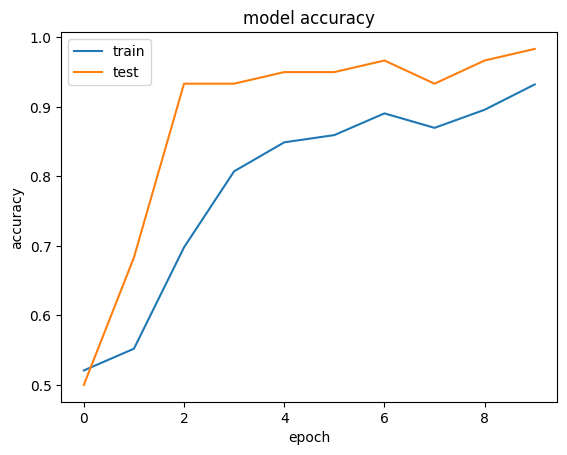

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Save the model online
model.save('/content/drive/MyDrive/Covid-19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model1 = load_model('/content/drive/MyDrive/Covid-19.h5')


In [ ]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

**Predictions from X-Ray Images**

1/1 [==============================] - 0s 186ms/step
1.0 : Normal


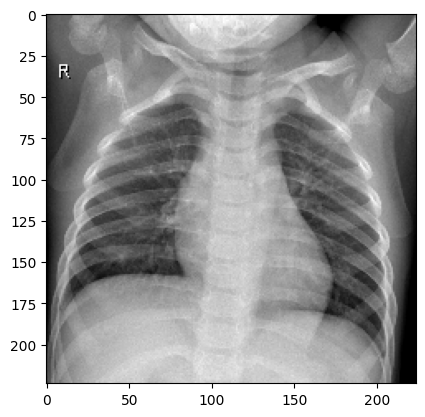

In [ ]:
# Import few more necessary libraries.
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
final_result = ""
# Function to load and prepare the image in right shape
def load_image(filename):
  # Load the image
  img = image.load_img(filename, target_size=(224, 224))
  # Convert the image to array
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  # model = load_model('/content/drive/MyDrive/Colab Notebooks/covid19detector.h5') /loaded above/
  p = model.predict(img)
  # Predict the output
  # Map category with the numerical class
  if p[0,0] == 0.0:
    final_result = "Covid Positive"
  elif p[0,0] == 1.0:
    final_result = "Normal"
  print(p[0,0], ":", final_result)

show_the_image('/content/drive/MyDrive/Covid-19/Dataset/Val/Normal/NORMAL2-IM-0416-0001-0001.jpeg')
load_image('/content/drive/MyDrive/Covid-19/Dataset/Val/Normal/NORMAL2-IM-0416-0001-0001.jpeg')

1/1 [==============================] - 0s 136ms/step
0.0 : Covid


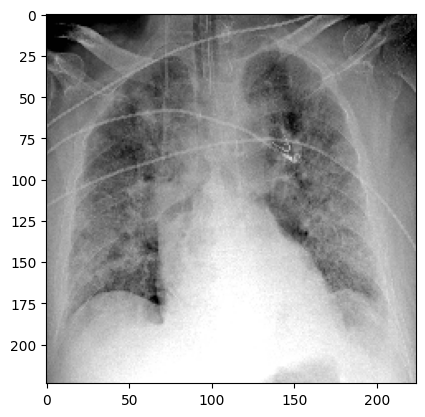

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
final_result = ""
# Function to load and prepare the image in right shape
def load_image(filename):
  # Load the image
  img = image.load_img(filename, target_size=(224, 224))
  # Convert the image to array
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  # model = load_model('/content/drive/MyDrive/Colab Notebooks/covid19detector.h5') /loaded above/
  p = model.predict(img)
  # Predict the output
  # Map category with the numerical class
  if p[0,0] == 0.0:
    final_result = "Covid"
  elif p[0,0] == 1.0:
    final_result = "normal"
  print(p[0,0], ":", final_result)

show_the_image('/content/drive/MyDrive/Covid-19/Dataset/Val/Covid/covid-19-pneumonia-12.jpg')
load_image('/content/drive/MyDrive/Covid-19/Dataset/Val/Covid/covid-19-pneumonia-12.jpg')